
### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2020 Semester 1

## Assignment 2


**Student Name(s):**    `Yanze Mao, Dong Cheng Ding

**Student ID(s):**     `988142 952328

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from collections import defaultdict

from sklearn import datasets, svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
# load datasets
review_text_test = pd.read_csv("COMP30027_2020_assignment2_datasets\\review_text_test.csv")
review_text_train = pd.read_csv("COMP30027_2020_assignment2_datasets\\review_text_train.csv")
review_text_test_meta = pd.read_csv("COMP30027_2020_assignment2_datasets\\review_meta_test.csv")
review_text_train_meta = pd.read_csv("COMP30027_2020_assignment2_datasets\\review_meta_train.csv")
review50=pd.read_csv("COMP30027_2020_assignment2_datasets\\review_text_train_doc2vec50.csv",header=None)
review100=pd.read_csv("COMP30027_2020_assignment2_datasets\\review_text_train_doc2vec100.csv",header=None)
review50_test=pd.read_csv("COMP30027_2020_assignment2_datasets\\review_text_test_doc2vec50.csv",header=None)
review100_test=pd.read_csv("COMP30027_2020_assignment2_datasets\\review_text_test_doc2vec100.csv",header=None)


In [34]:
def print_predict(result_test):
    id = [i for i in range(1,7019)]
    final_df = pd.DataFrame([id, result_test[0]]).T
    final_df = final_df.rename(columns={0:"instance_id", 1:"rating"})
    return final_df

# Adjustment for different models

## Navie Bayes

In [70]:
# MultinomialNB with countvectorizer

NB_clf=Pipeline([("vect", CountVectorizer(stop_words="english", decode_error="ignore")), 
                ("tfidf",TfidfTransformer()),
                ("clf", MultinomialNB())])
NBparameters={
     'tfidf__use_idf':(True,False),
    'clf__alpha':[0,0.001,0.01,0.1,0.2],
    'clf__fit_prior':[True,False]
}
NB_clf = GridSearchCV(NB_clf,NBparameters, cv = 5, n_jobs=-1)
NB_clf=NB_clf.fit(review_text_train["review"], review_text_train_meta["rating"])

In [71]:
NB_clf.best_params_

{'clf__alpha': 0.1, 'clf__fit_prior': False, 'tfidf__use_idf': False}

In [72]:
NB_clf.best_score_

0.8413852073535699

In [9]:
# MultinomialNB with vect50,100,200

NB_clf=Pipeline([
                ("clf", GaussianNB())])
NBparameters={
    'clf__var_smoothing':[1e-9,1e-8]
}
NB_clf = GridSearchCV(NB_clf,NBparameters, cv = 5, n_jobs=-1)
NB_clf=NB_clf.fit(review50, review_text_train_meta["rating"])

In [10]:
NB_clf.best_params_

{'clf__var_smoothing': 1e-09}

In [11]:
NB_clf.best_score_

0.6701938150206641

## Neural Network

In [61]:
# after adjustment of attributes, the best estimator with countervect:

MLP_clf = Pipeline([('vect',CountVectorizer(stop_words="english",decode_error='ignore')),
                    ("tfidf",TfidfTransformer(use_idf=True)),
                    ('clf',MLPClassifier(activation='relu', alpha=1e-05,
       hidden_layer_sizes=(80,100,100), solver='lbfgs'))])


scores2 = cross_validate(MLP_clf, review_text_train["review"], review_text_train_meta["rating"], cv = 5)
scores2["test_score"]

array([0.84683882, 0.85518347, 0.84574279, 0.8376982 , 0.8492516 ])

In [62]:
scores2["test_score"].mean()

0.8469429769356409

In [38]:
# after adjustment of attributes, the best estimator with vect50,100,200:

MLP_clf = Pipeline([
                    ('clf',MLPClassifier(activation='relu', alpha=1e-05,
       hidden_layer_sizes=(80,100,100), solver='lbfgs'))])


scores2 = cross_validate(MLP_clf, review50, review_text_train_meta["rating"], cv = 5)
scores2["test_score"]

array([0.75494212, 0.77075169, 0.76505166, 0.76679138, 0.76799715])

In [40]:
# after adjustment of attributes, the best estimator with vect50,100,200:

MLP_clf = Pipeline([
                    ('clf',MLPClassifier(solver='lbfgs'))])


scores2 = cross_validate(MLP_clf, review100, review_text_train_meta["rating"], cv = 5)
scores2["test_score"]

array([0.76028495, 0.76237976, 0.7680798 , 0.76946374, 0.76853172])

## SVM

In [12]:
#SVM with countervect
SVM_clf=Pipeline([("vect", CountVectorizer(stop_words="english", decode_error="ignore")), 
                ("tfidf",TfidfTransformer(use_idf=True)),
                ("clf", svm.SVC(kernel='linear', gamma=0.7, C=1.0))])

SVMparameters={
    "clf__gamma":[0.6,0.7,0.5,0.4],
    "clf__C":[0.5,0.7,1.0,2.0]
}
SVMgs_clf = GridSearchCV(SVM_clf,SVMparameters, cv = 5, n_jobs=-1)
SVMgs_clf=SVMgs_clf.fit(review_text_train["review"], review_text_train_meta["rating"])

In [15]:
SVMgs_clf.best_params_

{'clf__C': 1.0, 'clf__gamma': 0.6}

In [ ]:
SVMgs_clf.best_score_

In [5]:
#SVM with vect100
SVM_clf=Pipeline([
                ("clf", svm.SVC(kernel='linear', gamma=0.7, C=1.0))])

SVMparameters={
    "clf__gamma":[0.6,0.7,0.5,0.4],
    "clf__C":[0.5,0.7,1.0,2.0]
}
SVMgs_clf = GridSearchCV(SVM_clf,SVMparameters, cv = 5, n_jobs=-1)
SVMgs_clf=SVMgs_clf.fit(review100, review_text_train_meta["rating"])

In [6]:
SVMgs_clf.best_score_

0.8265640587145504

In [7]:
#SVM with vect100
SVM_clf=Pipeline([
                ("clf", svm.SVC(kernel='linear', gamma=0.7, C=1.0))])

SVMparameters={
    "clf__gamma":[0.6,0.7,0.5,0.4],
    "clf__C":[0.5,0.7,1.0,2.0]
}
SVMgs_clf = GridSearchCV(SVM_clf,SVMparameters, cv = 5, n_jobs=-1)
SVMgs_clf=SVMgs_clf.fit(review50, review_text_train_meta["rating"])

In [8]:
SVMgs_clf.best_score_

0.8165170300698305

In [9]:
SVMgs_clf.best_params_

{'clf__C': 0.7, 'clf__gamma': 0.6}

## RandomForest

In [19]:
# randomforestclassifier with countervect
RF_clf=Pipeline([("vect", CountVectorizer(stop_words="english", decode_error="ignore")), 
                ("tfidf",TfidfTransformer(use_idf=True)),
                ("clf", RandomForestClassifier())])

RFparameters={
    "tfidf__use_idf":[True,False],
    "clf__n_estimators":[100,300,500],
    "clf__criterion":["gini","entropy"],
    "clf__max_depth":[10,15,20,30],
    "clf__min_samples_split":[2,4,6],
}
RF_clf = GridSearchCV(RF_clf,RFparameters, cv = 5, n_jobs=-1)
RF_clf=RF_clf.fit(review_text_train["review"], review_text_train_meta["rating"])

In [23]:
RF_clf.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 30,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 100,
 'tfidf__use_idf': False}

In [22]:
RF_clf.best_score_

0.6955251531993729

In [30]:
# randomforestclassifier with countervect
RF_clf=Pipeline([("vect", CountVectorizer(stop_words="english", decode_error="ignore")), 
                ("tfidf",TfidfTransformer(use_idf=True)),
                ("clf", RandomForestClassifier())])

RFparameters={
    "tfidf__use_idf":[False],
    "clf__criterion":["gini","entropy"],
    "clf__min_samples_split":[2,4,6]
}
RF_clf = GridSearchCV(RF_clf,RFparameters, cv = 5, n_jobs=-1)
RF_clf=RF_clf.fit(review_text_train["review"], review_text_train_meta["rating"])
RF_clf.best_score_

H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7509975773122417

In [31]:
RF_clf.best_params_

{'clf__criterion': 'gini',
 'clf__min_samples_split': 2,
 'tfidf__use_idf': False}

In [42]:
# randomforestclassifier with vect50
RF_clf=Pipeline([
                ("clf", RandomForestClassifier())])

RFparameters={
    "clf__criterion":["gini","entropy"],
    "clf__min_samples_split":[6,8,9,10,12]
}
RF_clf = GridSearchCV(RF_clf,RFparameters, cv = 5, n_jobs=-1)
RF_clf=RF_clf.fit(review50, review_text_train_meta["rating"])
RF_clf.best_score_

H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7535271483539975

In [43]:
RF_clf.best_params_

{'clf__criterion': 'entropy', 'clf__min_samples_split': 9}

In [46]:
# randomforestclassifier with vect100
RF_clf=Pipeline([
                ("clf", RandomForestClassifier())])

RFparameters={
    "clf__criterion":["gini","entropy"],
    "clf__min_samples_split":[6,8,9,10,12,20]
}
RF_clf = GridSearchCV(RF_clf,RFparameters, cv = 5, n_jobs=-1)
RF_clf=RF_clf.fit(review100, review_text_train_meta["rating"])
RF_clf.best_score_

H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7399173435941285

In [47]:
RF_clf.best_params_

{'clf__criterion': 'entropy', 'clf__min_samples_split': 20}

# Final model After adjustment

In [3]:
RF_clf = RandomForestClassifier(criterion="entropy", min_samples_split=9) # vect50

SVM_clf = SVM_clf=Pipeline([("vect", CountVectorizer(stop_words="english", decode_error="ignore")), 
                ("tfidf",TfidfTransformer(use_idf=True)),
                ("clf", svm.SVC(kernel='linear', gamma=0.6, C=1.0))]) # countvect

NB_clf=Pipeline([("vect", CountVectorizer(stop_words="english", decode_error="ignore")), 
                ("tfidf",TfidfTransformer(use_idf=False)),
                ("clf", MultinomialNB(alpha=0.1, fit_prior=False))]) # countvect

MLP_clf = Pipeline([('vect',CountVectorizer(stop_words="english",decode_error='ignore')),
                    ("tfidf",TfidfTransformer(use_idf=True)),
                    ('clf',MLPClassifier(activation='relu', alpha=1e-05, 
                                         hidden_layer_sizes=(80,100,100), solver='lbfgs'))]) # countvect

### 1. Randomforest

In [5]:
RF_clf.fit(review50,review_text_train_meta["rating"])
RFresult=RF_clf.predict(review50)
RFresult_test = RF_clf.predict(review50_test)

H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
scores_RF = cross_validate(RF_clf,review50,review_text_train_meta["rating"], cv = 5)
scores_RF

{'fit_time': array([1.77358866, 1.79341125, 1.78440332, 1.77241015, 1.76973701]),
 'score_time': array([0.00900149, 0.01000166, 0.01000237, 0.00900126, 0.00900269]),
 'test_score': array([0.74425646, 0.74527966, 0.75721411, 0.74790665, 0.74786172])}

          0         1         2
0  0.301170  0.235380  0.463450
1  0.036999  0.346173  0.616827
2  0.003470  0.051006  0.945524


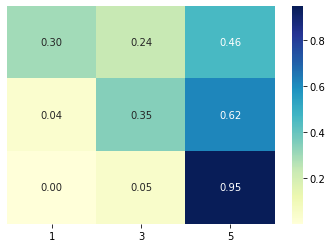

In [35]:
X_train, X_test, y_train, y_test = train_test_split(review50,review_text_train_meta["rating"],test_size=0.3, random_state=0)

RF_clf.fit(X_train, y_train)
y_predict = RF_clf.predict(X_test)
confusion_m = confusion_matrix(y_test, y_predict,labels = [1,3,5])
confusion_m_n = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
confusion_m_n = pd.DataFrame(confusion_m_n)
print(confusion_m_n)
sb.heatmap(confusion_m_n, fmt='.2f',cmap="YlGnBu",yticklabels=False, xticklabels=[1,3,5], annot = True)

In [44]:
print_predict(pd.DataFrame(RFresult_test)).to_csv("Randomforest_predict.csv", index = None)

### 2. Support Vector Machine

In [8]:
SVM_clf.fit(review_text_train["review"],review_text_train_meta["rating"])
SVMresult=SVM_clf.predict(review_text_train["review"])
SVMresult_test = SVM_clf.predict(review_text_test["review"])

In [9]:
# use cross validation to get its performance
scores_SVM = cross_validate(SVM_clf,review_text_train["review"],review_text_train_meta["rating"], cv = 5)
scores_SVM

{'fit_time': array([121.5431385 , 122.24777293, 121.41230416, 123.52639389,
        122.3077116 ]),
 'score_time': array([18.82370234, 19.05180788, 18.75234628, 18.70372248, 18.81074667]),
 'test_score': array([0.84683882, 0.85696473, 0.85892412, 0.84999109, 0.85531005])}

          0         1         2
0  0.703216  0.184211  0.112573
1  0.042575  0.644197  0.313229
2  0.003296  0.048751  0.947953


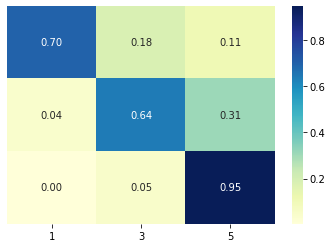

In [36]:
X_train, X_test, y_train, y_test = train_test_split(review_text_train["review"],review_text_train_meta["rating"],test_size=0.3, random_state=0)

SVM_clf.fit(X_train, y_train)
y_predict = SVM_clf.predict(X_test)
confusion_m = confusion_matrix(y_test, y_predict,labels = [1,3,5])
confusion_m_n = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
confusion_m_n = pd.DataFrame(confusion_m_n)
print(confusion_m_n)
sb.heatmap(confusion_m_n, fmt='.2f',cmap="YlGnBu",yticklabels=False, xticklabels=[1,3,5], annot = True)

In [45]:
print_predict(pd.DataFrame(SVMresult_test)).to_csv("SVM_predict.csv", index = None)

### 3. Neural Network

In [11]:
MLP_clf.fit(review_text_train["review"],review_text_train_meta["rating"])
MLPresult = MLP_clf.predict(review_text_train["review"])
MLPresult_test = MLP_clf.predict(review_text_test["review"])

In [12]:
# use cross validation to get its performance
scores_MLP = cross_validate(MLP_clf,review_text_train["review"],review_text_train_meta["rating"], cv = 5)
scores_MLP

{'fit_time': array([86.64887404, 89.47489405, 89.27473116, 88.80780244,  8.8344965 ]),
 'score_time': array([0.43709898, 0.42960143, 0.43709922, 0.42709661, 0.42809653]),
 'test_score': array([0.85289403, 0.84324902, 0.84609904, 0.84642794, 0.68727726])}

          0         1         2
0  0.754386  0.143275  0.102339
1  0.063355  0.637608  0.299037
2  0.007287  0.062110  0.930604


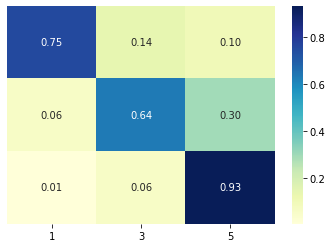

In [33]:
X_train, X_test, y_train, y_test = train_test_split(review_text_train["review"],review_text_train_meta["rating"],test_size=0.3, random_state=0)

MLP_clf.fit(X_train, y_train)
y_predict = MLP_clf.predict(X_test)
confusion_m = confusion_matrix(y_test, y_predict,labels = [1,3,5])
confusion_m_n = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
confusion_m_n = pd.DataFrame(confusion_m_n)
print(confusion_m_n)
sb.heatmap(confusion_m_n, fmt='.2f',cmap="YlGnBu",yticklabels=False, xticklabels=[1,3,5], annot = True)

In [46]:
print_predict(pd.DataFrame(MLPresult_test)).to_csv("NeuralNetwork_predict.csv", index = None)

### 4. STACKING

In [14]:
other=svm.SVC(kernel='rbf', gamma=0.7, C=1.0)

In [15]:
# fit the model
NB=NB_clf.fit(review_text_train["review"], review_text_train_meta["rating"])

In [16]:
otherinfo = review_text_train_meta[["vote_funny", "vote_cool", "vote_useful"]]
otherinfo_test = review_text_test_meta[["vote_funny", "vote_cool", "vote_useful"]]

In [17]:
other.fit(otherinfo,review_text_train_meta["rating"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# predict the result
NBresult=NB.predict(review_text_train["review"])
NBresult_test = NB.predict(review_text_test["review"])
otherresult = other.predict(otherinfo)
otherresult_test = other.predict(otherinfo_test)

          0         1         2
0  0.647661  0.301170  0.051170
1  0.051191  0.707045  0.241764
2  0.008154  0.077897  0.913949


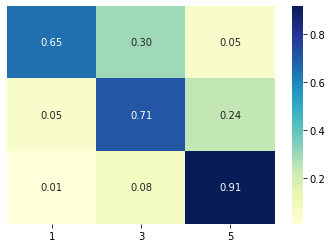

In [49]:
X_train, X_test, y_train, y_test = train_test_split(review_text_train["review"],review_text_train_meta["rating"],test_size=0.3, random_state=0)

NB_clf.fit(X_train, y_train)
y_predict = NB_clf.predict(X_test)
confusion_m = confusion_matrix(y_test, y_predict,labels = [1,3,5])
confusion_m_n = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
confusion_m_n = pd.DataFrame(confusion_m_n)
print(confusion_m_n)
sb.heatmap(confusion_m_n, fmt='.2f',cmap="YlGnBu",yticklabels=False, xticklabels=[1,3,5], annot = True)

In [19]:
finaldf = pd.DataFrame([NBresult, SVMresult,RFresult,MLPresult,otherresult]).T

In [20]:
finaldf

,0,1,2,3,4
0,5,1,1,5,5
1,5,5,5,5,5
2,5,5,5,5,5
3,3,5,3,5,3
4,3,3,3,3,5
...,...,...,...,...,...
28063,1,1,1,1,5
28064,1,1,1,1,5
28065,5,5,5,5,1
28066,5,5,5,5,5


In [21]:
final=RandomForestClassifier(criterion="entropy", min_samples_split=9)
final.fit(finaldf,review_text_train_meta["rating"])

H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
#get the predicted results of test

predictdf = pd.DataFrame([NBresult_test,
                          SVMresult_test,
                          RFresult_test,
                          MLPresult_test,
                          otherresult_test]).T

In [23]:
final_clf=RandomForestClassifier(criterion="entropy", min_samples_split=9)
scores2 = cross_validate(final_clf, finaldf,review_text_train_meta["rating"], cv = 5)
scores2

H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

{'fit_time': array([0.03500772, 0.03400779, 0.03500795, 0.03500748, 0.03600788]),
 'score_time': array([0.0040009 , 0.0040009 , 0.00400114, 0.00400114, 0.00400138]),
 'test_score': array([0.97061443, 0.9727467 , 0.96989669, 0.97309816, 0.97380613])}

In [24]:
final_RF=RandomForestClassifier(criterion="entropy", min_samples_split=9)

final_NB=MultinomialNB(alpha=0.1, fit_prior=False)
final_NB.fit(finaldf,review_text_train_meta["rating"])
result_test=pd.DataFrame(final.predict(predictdf))
result_test

,0
0,5
1,5
2,1
3,5
4,5
...,...
7013,5
7014,5
7015,3
7016,5


In [25]:
def print_predict(result_test):
    id = [i for i in range(1,7019)]
    final_df = pd.DataFrame([id, result_test[0]]).T
    final_df = final_df.rename(columns={0:"instance_id", 1:"rating"})
    return final_df

In [26]:
print_predict(result_test).to_csv("stacking_test_NB.csv", index=None)

score: 0.84

In [47]:
print_predict(pd.DataFrame(NBresult_test)).to_csv("NB_predict.csv", index = None)

score: 0.82660

In [107]:
# self check
from sklearn.metrics import accuracy_score

predictdf = pd.DataFrame([NB.predict(review_text_train["review"]),
                          SVM.predict(review_text_train["review"]),
                          RF.predict(review50),
                          MLP.predict(review_text_train["review"]),
                          other.predict(otherinfo)]).T

result=final.predict(predictdf)
acc = accuracy_score(review_text_train_meta["rating"],result)
acc

0.9639803334758443

In [24]:
print_predict(result_test).to_csv("SVMpredict.csv", index = None)

score: 0.846

#### another try with 1-fold stacking

In [29]:
finaldf2 = pd.DataFrame([NBresult, SVMresult,RFresult,MLPresult]).T
predictdf2 = pd.DataFrame([NBresult_test,SVMresult_test,RFresult_test,MLPresult_test]).T

final_NB=MultinomialNB(alpha=0.1, fit_prior=False)
final_NB.fit(finaldf2,review_text_train_meta["rating"])
result_test=pd.DataFrame(final_NB.predict(predictdf2))
result_test

,0
0,5
1,5
2,5
3,3
4,5
...,...
7013,5
7014,5
7015,5
7016,5


In [32]:
print_predict(result_test).to_csv("stacking_4_model.csv", index = None)

score: 0.67

### 5-cv stacking

In [172]:
df_rating = review_text_train_meta[["rating"]]
df_meta = review_text_train_meta[["vote_funny", "vote_cool", "vote_useful"]]

In [173]:
def split(x, y):
    x1, remain_x1, y1, remain_y1 = train_test_split(x, y, test_size = 0.8, random_state = 42)
    x2, remain_x2, y2, remain_y2 = train_test_split(remain_x1, remain_y1, test_size = 0.75, random_state = 42)
    x3, remain_x3, y3, remain_y3 = train_test_split(remain_x2, remain_y2, test_size = 0.6666, random_state = 42)
    x4, x5, y4, y5 = train_test_split(remain_x3, remain_y3, test_size = 0.5, random_state = 42)
    x_list = [x1, x2, x3, x4, x5]
    y_list = [y1, y2, y3, y4, y5]
    return [x_list, y_list]

In [174]:
x_vect50, y_vect50 = split(review50, df_rating)
x_review, y_review = split(review_text_train, df_rating)
x_meta, y_meta = split(df_meta, df_rating)

In [175]:

def predict(clf, x1, x2, y1):
    clf.fit(x1.y1)
    return clf.predict(x2)


In [177]:
#predict use 4 out of 5 x,y
final_5_fold = pd.DataFrame([])
for test in range(5):
    test_meta=x_meta[test]
    test_review=x_review[test]
    test_vect50=x_vect50[test]
    train_meta=pd.DataFrame()
    train_review=pd.DataFrame()
    train_vect50=pd.DataFrame()
    y=pd.DataFrame()

    for i in range(5):
        if i!=test:
            train_meta=pd.concat([train_meta,x_meta[i]])
            train_vect50=pd.concat([train_vect50,x_vect50[i]])
            
            train_review=pd.concat([train_review,x_review[i]])
            y=pd.concat([y,y_meta[i]])

    RF_clf = RandomForestClassifier(criterion="entropy", min_samples_split=9) # vect50

    SVM_clf = SVM_clf=Pipeline([("vect", CountVectorizer(stop_words="english", decode_error="ignore")), 
                    ("tfidf",TfidfTransformer(use_idf=True)),
                    ("clf", svm.SVC(kernel='linear', gamma=0.6, C=1.0))]) # countvect

    NB_clf=Pipeline([("vect", CountVectorizer(stop_words="english", decode_error="ignore")), 
                    ("tfidf",TfidfTransformer(use_idf=False)),
                    ("clf", MultinomialNB(alpha=0.1, fit_prior=False))]) # countvect

    MLP_clf = Pipeline([('vect',CountVectorizer(stop_words="english",decode_error='ignore')),
                        ("tfidf",TfidfTransformer(use_idf=True)),
                        ('clf',MLPClassifier(activation='relu', alpha=1e-05, 
                         hidden_layer_sizes=(80,100,100), solver='lbfgs'))]) # countvect


    other=svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
    # fit the model
    NB=NB_clf.fit(train_review["review"], y)
    RF=RF_clf.fit(train_vect50, y)
    SVM=SVM_clf.fit(train_review["review"], y)
    MLP=MLP_clf.fit(train_review["review"], y)
    other = other.fit(train_meta,y)
    
    otherinfo=test_meta[["vote_funny", "vote_cool", "vote_useful"]]
    NBresult=NB.predict(test_review["review"])
    SVMresult=SVM.predict(test_review["review"])
    RFresult=RF.predict(test_vect50)
    MLPresult=MLP.predict(test_review["review"])
    otherresult = other.predict(otherinfo)

    finaldf_part =pd.DataFrame([NBresult,SVMresult,RFresult,MLPresult,otherresult]).T
    final_5_fold = pd.concat([final_5_fold,finaldf_part], axis=0)

H:\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
H:\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\anaconda3\lib\site-packages\sklearn\neural_network\multilaye

In [187]:
predictdf_for5fold = pd.DataFrame([NBresult_test,SVMresult_test,RFresult_test,MLPresult_test,otherresult_test]).T
predictdf_for5fold

,0,1,2,3,4
0,5,5,5,5,5
1,5,5,5,5,5
2,1,1,1,1,5
3,3,5,5,5,5
4,5,5,5,3,5
...,...,...,...,...,...
7013,5,5,5,5,5
7014,5,3,5,3,5
7015,3,3,5,3,5
7016,5,5,5,5,1


In [188]:
final_clf=RandomForestClassifier()
final_clf.fit(final_5_fold,df_rating)

result_5f_stack=pd.DataFrame(final_clf.predict(predictdf_for5fold))

H:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [135]:
print_predict(result_5f_stack).to_csv("5f_stack.csv", index = None)